#Stochastic Gradient Descent
by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------

Stochastic Gradient Descent is a simple yet very efficient method to solve large-scale Machine Learning problems. The idea of SGD is to solve an optimization problem by searching for the minima by updating the model along the direction of descending the cost function's gradient. The model is updated in an "online" way by using recursively each of the shuffled samples.   

### Batch GD, Stochastic GD and mini-batch GD 

Suppose we need solve an optimization problem of finding $w$ such that it minimizes a cost function $F(w,x,t)$, the standard ("batch") Gradient Descent method is an iterative procedure to find the minima of $F(w)$ by updating $w$ along the gardient descent direction:
* repeat until convergence
    *    $w=w-\eta \frac{\partial F(w,x,t)}{w}$

where $\eta$ is the learning rate. Each iteration will use all the training data $(x,t)$ that are available. This causes a problem of computation when the size of data is too big. It also does not allow the "online" learning where the model is required to be re-trained each time new data arrives. 

Stochastic GD helps to solve this problem by updating $w$ for each sample. By shuffling the data, it is shown that the gradient descent also leads to convergence:
* shuffle the data of N sample
* repeat until convergence
    * for i=1:N
        * $w^{i+1}=w^i-\eta \frac{\partial F(w,x^i,t^i)}{w}$
The number of iterations (repeat until convergence) is usually much smaller than that of batch gradient descent. This comes with less computations and also the flexibility of online learning. The disadvantage is to have one more parameter to tune (number of iterations), and also the speed of computation (since batch GD if possible can be vectorized).

A good compromise is probably mini-batch GD, where $n$ samples are drawn out of total N samples each steps:
* shuffle the data of N sample
* repeat until convergence
    * for i=1:N/n
        * draw n samples $(x^i,t^i)$ out of N samples
        * $w^{i+1}=w^i-\eta \frac{\partial F(w,x^i,t^i)}{w}$
     
Another version of SGD is averaged SGD, where the parameter $w$ is updated the same way as in SGD. The different is that all $w^i$ are kept and averaged at the end to give the final optimized $w$:

$$w=\frac{1}{N}\sum_i=0^{N-1} w^i$$

Note: since some values at the early stage of the optimization may be not so good, one can decide to average all the values after sometime.

### Gradient Descent with SKLEARN
Skilearn provides with SGD solver for both classification and regression problems: 
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">SGDClassifier</a> for classification
* <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor">SGDRegressor</a> for regression

One notice when using SGD is that it is very sensitive to feature scaling, so remember to include this always.

SGD provides ** *average*: bool or int **to perform ASGD. When set to *True*, computes the averaged SGD weights and stores the result in the coef_ attribute. If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples.

### Examples: recognition of hand-written digits 

This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

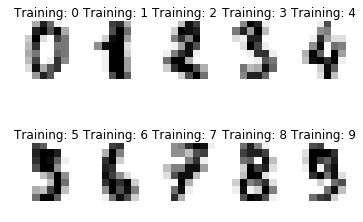

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#Load the digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

#### SGD using <a href='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html'> *sklearn.linear_model.SGDClassifier*</a>

Linear classifiers (SVM, logistic regression) with SGD training: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule. 

Notes: 
* SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. 

* For best results using the default learning rate schedule, the data should have zero mean and unit variance.

* *sklearn.cross_validation.train_test_split*: divide data into testing and training set randomly

training SGD
training ASGD


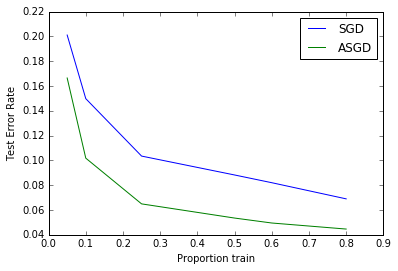

In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.40, 0.20]
heldint = 1. - np.array(heldout)

num_iters = 30
X, y = digits.data, digits.target

# check also minibatch SGD (http://stackoverflow.com/questions/15036630/batch-gradient-descent-with-scikit-learn-sklearn_
classifiers = [("SGD", SGDClassifier(loss='log')),
               ("ASGD", SGDClassifier(loss='log',average=True))]

# loop over different Gradient Descent methods
for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(num_iters):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(heldint, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()


Remarks:

* One should check the convergence of the training by looking at the error curve as function of number of iterations

* The curve showing here is not convergence curve of the training, but showing the error as percentage of data used for training. One notice that larger set of training data gives smaller prediction error. By observing this kind of curve, one can decide also whether it is worth to collect more data for training or not.

* From the plot, it seems Stochastic Average Gradient descent work well in practice

## Minibatch GD and Out-of-core problem with big dataset
This <a href='http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html#example-applications-plot-out-of-core-classification-py'>link</a> provides an example of comparing various techniques and corresponding runtime and error.

Compare SGD with batch GD and minibatch GD in term of prediction error. Batch GD requires heavy computation when training data is big, while it is expected to give lower prediction error. Minibatch GD is a good compromise (but the optimal size of the minibatch is also a parameter to optimize)

Depending on the algorithm the mini-batch size can influence results or not. SGD*, PassiveAggressive*, and discrete NaiveBayes are truly online and are not affected by batch size. Conversely, MiniBatchKMeans convergence rate is affected by the batch size. Also, its memory footprint can vary dramatically with batch size